# Exercise 0 : Import Libraries

In [125]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet


# Exercise 1 : Read the Dataset

In [70]:
df = pd.read_csv("heart_disease.csv")
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# Exercise 2 : Drop Unnamed: 0 column

In [71]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Exercise 3 : EDA

1. Basic info.
2. Number of rows and columns.
3. Statistical describtion.
4. Columns names.
5. Explore the columns ca and thal using any technique.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [73]:
df.shape

(303, 14)

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [75]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'present']

In [76]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [77]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

In [78]:
df=df[df['ca']!= '?']
df=df[df['thal']!= '?']

In [79]:
#Another way
df=df.drop(df[df['ca'] =="?"].index)

In [80]:
df['ca'].value_counts()

ca
0.0    174
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [81]:
df['thal'].value_counts()

thal
3.0    164
7.0    115
6.0     18
Name: count, dtype: int64

# Exercise 4 : Handle missing data

In [82]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
present     0
dtype: int64

In [84]:
#Total
df.isna().sum().sum()

0

# Exercise 5 : Handle Features

- Use one method between these two methods for the object type columns :-
    1. Convert data type to numeric.
    2. One hot encoding.

In [90]:
df[['ca','thal']]=df[['ca','thal']].apply(pd.to_numeric)

In [86]:
#same
df[['ca','thal']]=df[['ca','thal']].astype(int)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  present   297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


# Exercise 6 : Remove Outliers (If exists)

- Use box plots for some continuous data.

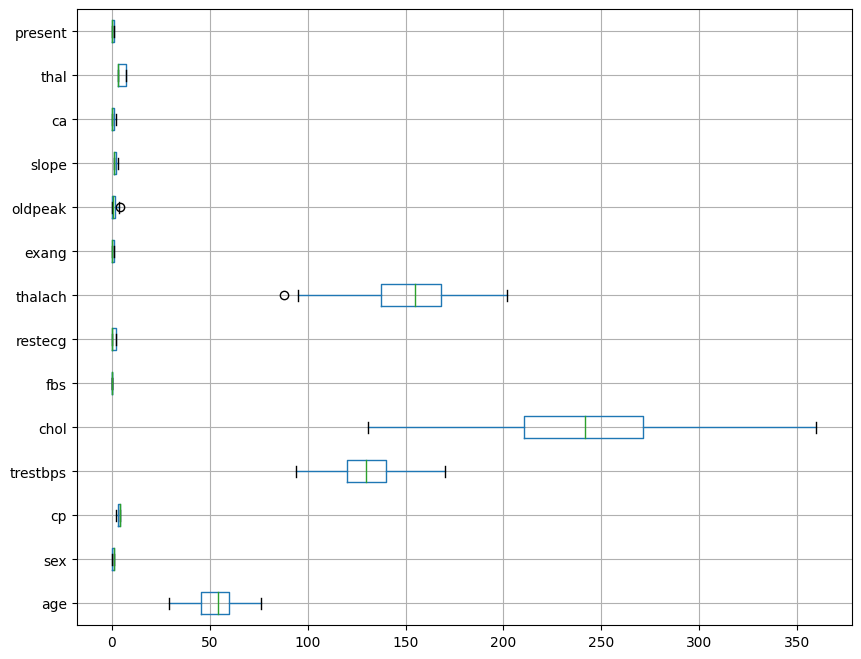

In [69]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

plt.figure(figsize=(10, 8))
df_no_outliers.boxplot(vert=False)
plt.show()

# Exercise 7 : Feature Selection using Correlation Matrix

1. Calculate the Correlation Matrix.
2. Identify Highly Correlated Features.
    - The threshold is 0.6
3. Remove Highly Correlated Features.

In [96]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


In [102]:
threshold = 0.6
highly_correlated = df.corr()[abs(df.corr()) > threshold]
highly_correlated

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [103]:
df.drop(highly_correlated, axis=1)

""
0
1
2
3
4
...
297
298
299
300


# Exercise 8 : X and Y split, then train and test split

In [106]:
X = df.drop('present', axis=1) 
Y = df['present']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (237, 13)
X_test shape: (60, 13)
Y_train shape: (237,)
Y_test shape: (60,)


# Exercise 9 : Train the model

In [108]:
model = LogisticRegression()

model.fit(X_train, Y_train)

accuracy = model.score(X_test, Y_test)

print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


# Exercise 10 : Evaluate the model

1. Find the score of the training data.
2. Find the scores of the testing data :-
    - Find the accuracy.
    - Find the Sensitivity.
    - Find the Specificity.
    - Find the Sensitivity/Specificity.
    - Find the AUC-ROC.

In [109]:
train_score = model.score(X_train, Y_train)

print("Training Score:", train_score)

Training Score: 0.8438818565400844


In [112]:
Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)

sensitivity_specificity = sensitivity / specificity

auc_roc = roc_auc_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Sensitivity/Specificity:", sensitivity_specificity)
print("AUC-ROC:", auc_roc)

Accuracy: 0.8666666666666667
Sensitivity: 0.875
Specificity: 0.8611111111111112
Sensitivity/Specificity: 1.0161290322580645
AUC-ROC: 0.8680555555555556


# Exercise 11 : Find the wights and y intercept

In [115]:
weights = model.coef_
y_intercept = model.intercept_

print("Weights:", weights)
print("Y-intercept:", y_intercept)

Weights: [[-0.03891842  0.96718369  0.22108885  0.01870098  0.00431386 -0.76327509
   0.22629817 -0.03705396  0.79627328  0.33820475  0.06890277  1.14064676
   0.29052702]]
Y-intercept: [-0.20866124]


# Exercise 12 : Plot the model complexity

- Is the model overfit? Underfit? Good? Explain

In [ ]:
#optional

# Exercise 13 : Use Regularizations

1. Build three models with Lasso Regularization and three different lambda values.
2. Build three models with Ridge Regularization and three different lambda values.
3. Build three models with Elastic-net Regularization and three different lambda values.

In general, you need to build 9 models with different Regularizations and different lambda values.

Do not forget to evaluate them (find accuracy, recall, precision, f1 score, AUC-ROC).

In [130]:
lambda_values = [0.1, 0.01, 0.001]  

lasso_models = []
for lambda_val in lambda_values:
    lasso_model = Lasso(alpha=lambda_val)
    lasso_model.fit(X_train, y_train)
    lasso_models.append(lasso_model)

ridge_models = []
for lambda_val in lambda_values:
    ridge_model = Ridge(alpha=lambda_val)
    ridge_model.fit(X_train, y_train)
    ridge_models.append(ridge_model)

elasticnet_models = []
for lambda_val in lambda_values:
    elasticnet_model = ElasticNet(alpha=lambda_val)
    elasticnet_model.fit(X_train, y_train)
    elasticnet_models.append(elasticnet_model)


for i, lambda_val in enumerate(lambda_values):
    print(f"Lambda: {lambda_val}")
    print("Lasso Scores:", lasso_scores[i])
    print("Ridge Scores:", ridge_scores[i])
    print("ElasticNet Scores:", elasticnet_scores[i])
    print()

NameError: name 'y_train' is not defined

In [127]:

lambda_values = [0.1, 0.01, 0.001]

lasso_models = []
for lambda_val in lambda_values:
    lasso_model = Lasso(alpha=lambda_val)
    lasso_model.fit(X_train, y_train)
    lasso_models.append(lasso_model)

ridge_models = []
for lambda_val in lambda_values:
    ridge_model = Ridge(alpha=lambda_val)
    ridge_model.fit(X_train, y_train)
    ridge_models.append(ridge_model)

elasticnet_models = []
for lambda_val in lambda_values:
    elasticnet_model = ElasticNet(alpha=lambda_val)
    elasticnet_model.fit(X_train, y_train)
    elasticnet_models.append(elasticnet_model)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    return accuracy, recall, precision, f1, auc_roc

lasso_scores = []
for lasso_model in lasso_models:
    scores = evaluate_model(lasso_model, X_test, y_test)
    lasso_scores.append(scores)

ridge_scores = []
for ridge_model in ridge_models:
    scores = evaluate_model(ridge_model, X_test, y_test)
    ridge_scores.append(scores)

elasticnet_scores = []
for elasticnet_model in elasticnet_models:
    scores = evaluate_model(elasticnet_model, X_test, y_test)
    elasticnet_scores.append(scores)

for i, lambda_val in enumerate(lambda_values):
    print(f"Lambda: {lambda_val}")
    print("Lasso Scores:", lasso_scores[i])
    print("Ridge Scores:", ridge_scores[i])
    print("ElasticNet Scores:", elasticnet_scores[i])
    print()

NameError: name 'y_train' is not defined

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lambda_values = [0.1, 0.01, 0.001]

lasso_models = []
for lambda_val in lambda_values:
    lasso_model = Lasso(alpha=lambda_val)
    lasso_model.fit(X_train, y_train)
    lasso_models.append(lasso_model)

ridge_models = []
for lambda_val in lambda_values:
    ridge_model = Ridge(alpha=lambda_val)
    ridge_model.fit(X_train, y_train)
    ridge_models.append(ridge_model)

elasticnet_models = []
for lambda_val in lambda_values:
    elasticnet_model = ElasticNet(alpha=lambda_val)
    elasticnet_model.fit(X_train, y_train)
    elasticnet_models.append(elasticnet_model)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    return accuracy, recall, precision, f1, auc_roc

lasso_scores = []
for lasso_model in lasso_models:
    scores = evaluate_model(lasso_model, X_test, y_test)
    lasso_scores.append(scores)

ridge_scores = []
for ridge_model in ridge_models:
    scores = evaluate_model(ridge_model, X_test, y_test)
    ridge_scores.append(scores)

elasticnet_scores = []
for elasticnet_model in elasticnet_models:
    scores = evaluate_model(elasticnet_model, X_test, y_test)
    elasticnet_scores.append(scores)

for i, lambda_val in enumerate(lambda_values):
    print(f"Lambda: {lambda_val}")
    print("Lasso Scores:", lasso_scores[i])
    print("Ridge Scores:", ridge_scores[i])
    print("ElasticNet Scores:", elasticnet_scores[i])
    print()

NameError: name 'y' is not defined